# Матиенко А.П. ИУ5-61Б, В-14

### Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

In [1]:
import pandas as pd
import numpy as np

## Извлечение dataset

In [2]:
import os
import zipfile

DATA_PATH = os.path.join('datasets')

def fetch_data(data_path=DATA_PATH):
    os.makedirs(data_path, exist_ok=True)
    zip_path = os.path.join(data_path, 'human-resources-data-set.zip')
    data_zip = zipfile.ZipFile(zip_path)
    data_zip.extractall(path=data_path)
    data_zip.close()

In [3]:
fetch_data()

In [4]:
def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, 'HRDataset_v13.csv')
    return pd.read_csv(csv_path)

In [5]:
data = load_data()
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Employee_Name                  91
EmpID                          91
MarriedID                      91
MaritalStatusID                91
GenderID                       91
EmpStatusID                    91
DeptID                         91
PerfScoreID                    91
FromDiversityJobFairID         91
PayRate                        91
Termd                          91
PositionID                     91
Position                       91
State                          91
Zip                            91
DOB                            91
Sex                            91
MaritalDesc                    91
CitizenDesc                    91
HispanicLatino                 91
RaceDesc                       91
DateofHire                     91
DateofTermination             298
TermReason                     92
EmploymentStatus               91
Department                     91
ManagerName                    91
ManagerID                      99
RecruitmentSource              91
PerformanceSco

# В поле 'EngagementSurvey' пустые значения заменим на среднее

In [7]:
mean = data['EngagementSurvey'].mean()
data['EngagementSurvey'].fillna(mean, inplace=True)
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.040000,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.000000,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.900000,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.240000,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.000000,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN


## Категориальный признак 'Department':
## В нем пустые значение заменим на самые непопулярные из признака

In [8]:
departments = data['Department'].value_counts()
departments

Production              208
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Executive Office          1
Name: Department, dtype: int64

In [9]:
sum_depart = data['Department'].count()
sum_depart

310

In [10]:
list_prob = []
for department in departments.items():
    list_prob.append((department[0], department[1] / sum_depart))
list_prob.sort(key=lambda x: x[1])
list_prob

[('Executive Office', 0.0032258064516129032),
 ('Admin Offices', 0.03225806451612903),
 ('Software Engineering', 0.03225806451612903),
 ('Sales', 0.1),
 ('IT/IS', 0.16129032258064516),
 ('Production       ', 0.6709677419354839)]

In [11]:
data['Department'].fillna('Executive Office', inplace=True)
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.040000,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.000000,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.900000,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.240000,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.000000,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,NaN,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN


In [12]:
data['Department'].value_counts()

Production              208
Executive Office         92
IT/IS                    50
Sales                    31
Admin Offices            10
Software Engineering     10
Name: Department, dtype: int64

In [13]:
data['ManagerName'].value_counts()

Michael Albert        22
Kelley Spirea         22
Kissy Sullivan        22
Elijiah Gray          22
Amy Dunn              21
Brannon Miller        21
David Stanley         21
Webster Butler        21
Ketsia Liebig         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64

## Пустые значения в признаке 'ManagerName' заменим на самые часто встречаемые

In [14]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data[['ManagerName']])
train = imp.transform(data[['ManagerName']])

In [15]:
data['ManagerName'] = train

In [16]:
data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.040000,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.000000,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.900000,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.240000,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.000000,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,Elijiah Gray,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,Elijiah Gray,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,Elijiah Gray,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Executive Office,Elijiah Gray,NaN,NaN,NaN,3.332097,NaN,NaN,NaN,NaN


In [19]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

# График

In [17]:
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style='ticks')

In [18]:
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    os.makedirs("images", exist_ok=True)
    print("Saveing figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format="png", dpi=300)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


Saveing figure EngagementSurvey


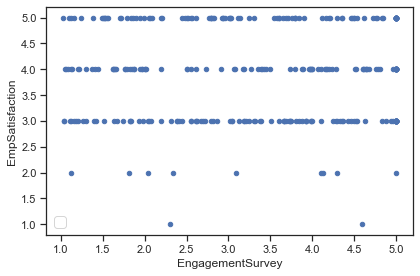

In [34]:
data.plot(kind='scatter', x='EngagementSurvey', y='EmpSatisfaction')
plt.legend(fontsize=15)
save_fig("EngagementSurvey")
plt.show()